In [21]:
import nibabel as nib
import nilearn.plotting as nplot
import trimesh
import numpy as np
import os
import matplotlib.pyplot as plt
import nilearn.image as nimg
import niviz.surface
from mpl_toolkits import mplot3d
from itertools import product

In [2]:
# Set up example file
sub = 'sub-UP1UP10206'
scratch = '/scratch/jjeyachandra/niviz/demo-hcppipelines/data/'
space = 'MNINonLinear'
surf_space = "fsaverage_LR32k"

In [3]:
shortname = {
    "Native": 'native',
    "fsaverage_LR32k": "32k_fs_LR",
    "": "164k_fs_LR"
}
volname = {
    "T1w": "T1w_acpc_dc.nii.gz",
    "MNINonLinear": "T1w.nii.gz"
}
l_surf = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
    f'{sub}.L.inflated.{shortname[surf_space]}.surf.gii'
))
r_surf = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
    f'{sub}.R.inflated.{shortname[surf_space]}.surf.gii'
))

surfmap = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
        f"{sub}.MyelinMap.{shortname[surf_space]}.dscalar.nii"
    )
)

sulc = nib.load(
    os.path.join(
        scratch, sub, space, surf_space,
        f"{sub}.sulc.{shortname[surf_space]}.dscalar.nii"
    )
)

In [22]:
lv, lt, lm = niviz.surface.map_cifti_to_gifti(l_surf, surfmap)
rv, rt, rm = niviz.surface.map_cifti_to_gifti(r_surf, surfmap)

_, _, slm = niviz.surface.map_cifti_to_gifti(l_surf, sulc)
_, _, srm = niviz.surface.map_cifti_to_gifti(r_surf, sulc)

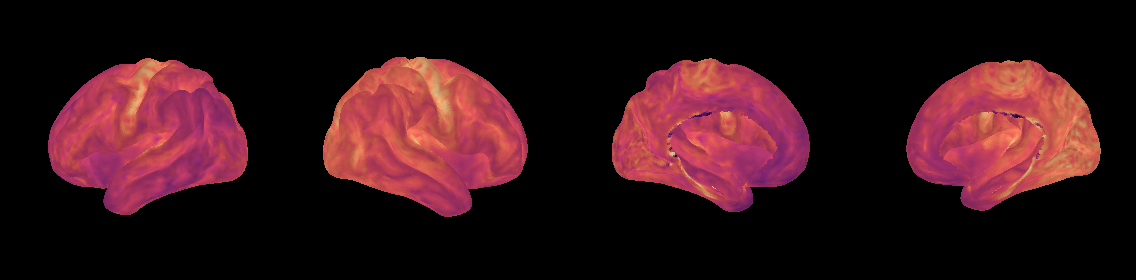

In [76]:
w, h = plt.figaspect(1/4)
fig, axs = plt.subplots(1, 4, subplot_kw={'projection':'3d'},
                       figsize=(w,h))
fig.tight_layout()


hemi_map = {
    "left": (lv, lt, lm),
    "right":(rv, rt, rm)
}
sulc_map = {
    "left": slm,
    "right": srm
}
fig.set_facecolor("black")

for v, ax in zip(product(views, hemi_map), axs.flat):
    ax.set_facecolor("black")
    view, hemi = v
    v, t, m = hemi_map[hemi]
    sm = sulc_map[hemi]
    nplot.plot_surf([v, t], surf_map=m,
                   bg_map=sm, cmap='magma',
                   axes=ax, hemi=hemi, view=view,
                   bg_on_data=True, darkness=0.3)

fig